In [151]:
import numpy as np              #моделирование пространства 
import matplotlib.pyplot as plt #построение графиков
from scipy.stats import expon   #экспоненциальное распредление
from scipy.stats import norm    #нормальное распределение
from math import sqrt           #взятие корня

Для десмонтрации центральноей предельной теоремы было выбрано эспоненциальное распредление c параментром $\lambda$ = 0.5.

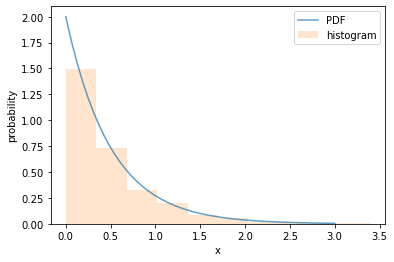

In [152]:
expon_lambda = 2
my_dist = expon.rvs(size=1000, scale = 1/expon_lambda) #генерируем выборку из 1000 значений из экспоненциального распределения

x = np.linspace(0, 3)
plt.plot(x, expon.pdf(x, scale = 1/expon_lambda), alpha=0.7, label='PDF') #демонстрирую теоритическую функцию плотности
plt.hist(my_dist, density=True, alpha=0.2, label = 'histogram') #построение гистограммы по выборке
plt.ylabel('probability')
plt.xlabel('x')
plt.legend()
plt.show()

Создаю фукнцию для подсчёта выборочных средник выборок разного объёма и построения гистограммы их распределений.

In [153]:
def create_samples(bin_capacity):
    bin1 = []
    for i in range(1000):
        one_bin = expon.rvs(size=bin_capacity, scale = 1/expon_lambda) #генерирую 1000 выборок выбранного объёма выборки
        sample_mean = 0
        for i in one_bin:
            sample_mean += i
        sample_mean /= bin_capacity #считаю арифметическое среднее для каждой из выборок
        bin1.append(sample_mean) #сохраняю значения средних для построения гистограммы
    plt.hist(bin1, density=True, alpha=0.6, label = '1000 samples of ' + str(bin_capacity) + ' objects')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend()

### Генерация выборок
Работаем с тремя выборками объёма 5, 10 и 100. На графике гистограммы выборок и эмпирическую плотность нормального распредления распределения поверх них.

Находим теоретические среднее и дисперсию экспоненциального распределения по даным формулам:

$EX = \frac{1}{\lambda}$,  $DX = \frac{1}{\lambda^2}$

Далее находим значение стандартного отклонения для задания функции нормального распределения.

In [154]:
mean = 1 / expon_lambda           #теоритические значения среднего 
variance = 1 / expon_lambda ** 2  #теоритические значения дисперсии

Задаём нормальные распредления, которыми, согласно центральной предельной теореме, приближаются распределения выборочных средних, по формуле: <br>
### $N(\mu=EX, \sigma^2= \frac{DX}{n})$, <br>
где $EX$ — среднее, а $\frac{DX}{n}$ — дисперсия, делёная на объём выборки $n$. В нашем случае числа 5, 10 и 50, соотвественно.

### Выборка объёма 5

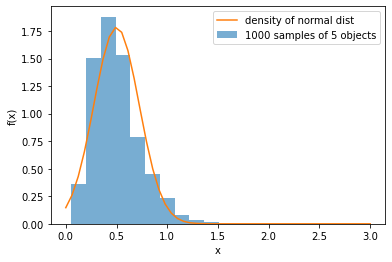

In [155]:
create_samples(5)
norm_rv = norm(mean, math.sqrt(variance/5))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='density of normal dist')
plt.legend()

### Выборка объёма 10

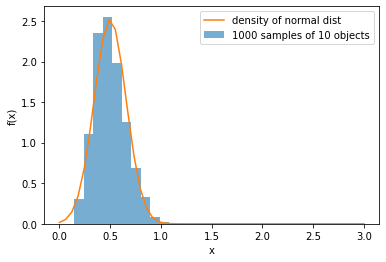

In [156]:
create_samples(10)
norm_rv = norm(mean, math.sqrt(variance/10))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='density of normal dist')
plt.legend()

### Выборка объёма 50

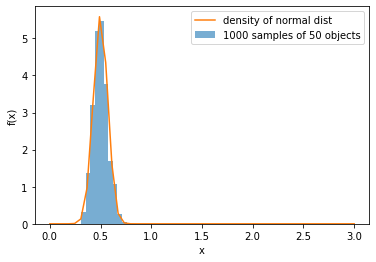

In [157]:
create_samples(50)
norm_rv = norm(mean, math.sqrt(variance/50))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='density of normal dist')
plt.legend()

С ростом объёма выборок n растёт и точность аппроксимации нормальным распредлением.